# Detecting Data Quality Issues in Real-World Datasets

This notebook will guide you through identifying common data quality problems that occur in real datasets. We'll work with a sample customer dataset that contains various intentional issues, and you'll learn how to systematically detect and document these problems.

## Import necessary libraries

We'll use pandas for data manipulation, numpy for numerical operations, and matplotlib/seaborn for visualizations.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

## Create sample dataset

Let's create a customer transaction dataset that contains various data quality issues commonly found in real-world data.

In [45]:
# Create a messy dataset with various data quality issues
np.random.seed(42)  # For reproducibility

data = {
    'customer_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 103, 114, 115],
    'name': ['John Smith', 'Jane Doe', 'Bob Johnson', 'Alice Brown', 'Charlie Wilson', 
             'Diana Prince', 'Eve Davis', 'Frank Miller', 'Grace Lee', 'Henry Taylor',
             'Iris Chen', 'Jack White', 'Bob Johnson', 'John Smith ', 'Jane doe'],
    'age': [25, 32, '45', 28, 67, 31, 5, 39, 42, 150, 35, 29, 45, 25, 32],
    'email': ['john@email.com', 'jane@email.com', None, 'alice@email', 'charlie@email.com',
              'diana@email.com', 'eve@email.com', 'frank@email.com', None, 'henry@email.com',
              'iris@email.com', 'jack@email.com', 'bob2@email.com', 'john@email.com', None],
    'signup_date': ['2023-01-15', '2023-02-20', '2023/03/10', '2023-04-05', '2023-05-12',
                   '2023-06-18', '2023-07-22', '23-08-30', '2023-09-14', '2023-10-20',
                   '2023-11-25', '2023-12-01', '2023-03-10', '2023-01-15', '2023-02-20'],
    'purchase_amount': [150.00, 200.50, 75.25, None, 500.00, 125.75, 80.00, 950.00, 
                       210.30, 45.50, None, 320.00, 75.25, 150.00, 10000.00],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 
             'NY', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
             'Austin', 'N.Y.', 'Chicago', 'New York', 'Los Angeles']
}

df = pd.DataFrame(data)
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (15, 7)


,customer_id,name,age,email,signup_date,purchase_amount,city
0,101,John Smith,25,john@email.com,2023-01-15,150.00,New York
1,102,Jane Doe,32,jane@email.com,2023-02-20,200.50,Los Angeles
2,103,Bob Johnson,45,None,2023/03/10,75.25,Chicago
3,104,Alice Brown,28,alice@email,2023-04-05,NaN,Houston
4,105,Charlie Wilson,67,charlie@email.com,2023-05-12,500.00,Phoenix


## Section 1: Missing Data Detection

Missing data is one of the most common data quality issues. Let's explore different ways to identify missing values in our dataset.

In [46]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      15 non-null     int64  
 1   name             15 non-null     object 
 2   age              15 non-null     object 
 3   email            12 non-null     object 
 4   signup_date      15 non-null     object 
 5   purchase_amount  13 non-null     float64
 6   city             15 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 972.0+ bytes


In [47]:
# Check for missing values in each column
missing_counts = df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Percentage': missing_percentage
})

print("Missing Data Summary:")
print(missing_summary[missing_summary['Missing_Count'] > 0])

Missing Data Summary:
                 Missing_Count  Percentage
email                        3   20.000000
purchase_amount              2   13.333333


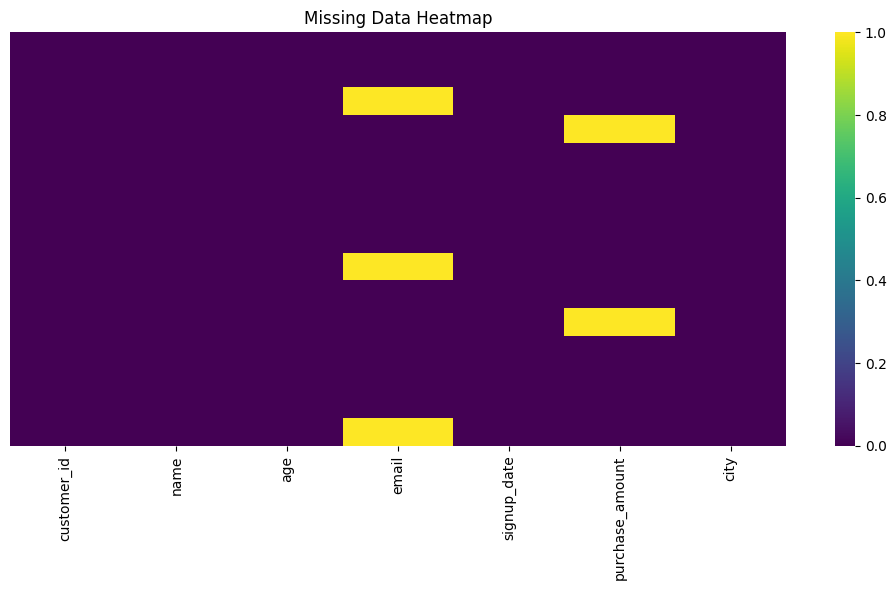

In [48]:
# Visualize missing data patterns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

### Exercise 1: Missing Data Analysis
Based on the analysis above, answer these questions:
1. Which columns have missing values?
2. What percentage of data is missing in each column?
3. Are there any patterns in the missing data?

In [49]:
# Your code here - identify rows with any missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print(f"Number of rows with at least one missing value: {len(rows_with_missing)}")
rows_with_missing

Number of rows with at least one missing value: 5


,customer_id,name,age,email,signup_date,purchase_amount,city
2,103,Bob Johnson,45,None,2023/03/10,75.25,Chicago
3,104,Alice Brown,28,alice@email,2023-04-05,NaN,Houston
8,109,Grace Lee,42,None,2023-09-14,210.30,Dallas
10,111,Iris Chen,35,iris@email.com,2023-11-25,NaN,Austin
14,115,Jane doe,32,None,2023-02-20,10000.00,Los Angeles


## Section 2: Identifying Duplicates

Duplicate records can skew analysis results and indicate data collection or processing issues.

In [50]:
# Check for exact duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
if len(duplicate_rows) > 0:
    print("\nDuplicate rows:")
    display(duplicate_rows.sort_values('customer_id'))

Number of duplicate rows: 0


In [51]:
# Check for duplicate customer IDs
duplicate_ids = df[df.duplicated(subset=['customer_id'], keep=False)]
print(f"Records with duplicate customer IDs: {len(duplicate_ids)}")
if len(duplicate_ids) > 0:
    display(duplicate_ids.sort_values('customer_id'))

Records with duplicate customer IDs: 2


,customer_id,name,age,email,signup_date,purchase_amount,city
2,103,Bob Johnson,45,None,2023/03/10,75.25,Chicago
12,103,Bob Johnson,45,bob2@email.com,2023-03-10,75.25,Chicago


In [52]:
# Check for potential duplicate names (case-insensitive)
df['name_lower'] = df['name'].str.lower().str.strip()
name_duplicates = df[df.duplicated(subset=['name_lower'], keep=False)]
print(f"Records with potentially duplicate names: {len(name_duplicates)}")
if len(name_duplicates) > 0:
    display(name_duplicates[['customer_id', 'name', 'email']].sort_values('name'))

# Clean up temporary column
df.drop('name_lower', axis=1, inplace=True)

Records with potentially duplicate names: 6


,customer_id,name,email
2,103,Bob Johnson,None
12,103,Bob Johnson,bob2@email.com
1,102,Jane Doe,jane@email.com
14,115,Jane doe,None
0,101,John Smith,john@email.com
13,114,John Smith,john@email.com


### Exercise 2: Duplicate Detection
Write code to find duplicate email addresses in the dataset.

In [53]:
# Your code here - find duplicate email addresses
# Hint: Remember to handle None values


## Section 3: Spotting Inconsistencies

Data inconsistencies can occur in formatting, naming conventions, and categorical values.

In [54]:
# Check for inconsistent date formats
print("Unique date formats in signup_date:")
print(df['signup_date'].unique())
print("\nNotice the different separators and formats used.")

Unique date formats in signup_date:
['2023-01-15' '2023-02-20' '2023/03/10' '2023-04-05' '2023-05-12'
 '2023-06-18' '2023-07-22' '23-08-30' '2023-09-14' '2023-10-20'
 '2023-11-25' '2023-12-01' '2023-03-10']

Notice the different separators and formats used.


In [55]:
# Check for inconsistent city names
city_values = df['city'].value_counts()
print("City value counts:")
print(city_values)
print("\nPotential inconsistencies:")
print("- 'New York', 'NY', and 'N.Y.' likely refer to the same city")

City value counts:
city
New York       2
Los Angeles    2
Chicago        2
Houston        1
Phoenix        1
NY             1
San Antonio    1
San Diego      1
Dallas         1
San Jose       1
Austin         1
N.Y.           1
Name: count, dtype: int64

Potential inconsistencies:
- 'New York', 'NY', and 'N.Y.' likely refer to the same city


In [56]:
# Check email format validity
def validate_email(email):
    if pd.isna(email):
        return 'Missing'
    elif '@' not in email:
        return 'Invalid - No @'
    elif not email.endswith('.com'):
        return 'Invalid - Wrong domain'
    else:
        return 'Valid'

df['email_validity'] = df['email'].apply(validate_email)
print("Email validation results:")
print(df['email_validity'].value_counts())
print("\nInvalid emails:")
display(df[df['email_validity'].str.startswith('Invalid')][['customer_id', 'name', 'email', 'email_validity']])

# Clean up temporary column
df.drop('email_validity', axis=1, inplace=True)

Email validation results:
email_validity
Valid                     11
Missing                    3
Invalid - Wrong domain     1
Name: count, dtype: int64

Invalid emails:


,customer_id,name,email,email_validity
3,104,Alice Brown,alice@email,Invalid - Wrong domain


### Exercise 3: Finding Inconsistencies
Check if there are any inconsistencies in the capitalization of names (e.g., "Jane Doe" vs "Jane doe").

In [57]:
# Your code here - find names with inconsistent capitalization


## Section 4: Detecting Outliers

Outliers can be legitimate extreme values or data entry errors. Let's identify potential outliers in numerical columns.

In [58]:
# First, let's check the data type of the age column
print("Data type of age column:", df['age'].dtype)
print("\nUnique age values:")
print(df['age'].unique())
print("\nUnique age values (sorted by converting to numeric first):")
# Convert to numeric, handling non-numeric values, then sort
age_numeric = pd.to_numeric(df['age'], errors='coerce')
print(sorted(age_numeric.dropna().unique()))

Data type of age column: object

Unique age values:
[25 32 '45' 28 67 31 5 39 42 150 35 29 45]

Unique age values (sorted by converting to numeric first):
[np.int64(5), np.int64(25), np.int64(28), np.int64(29), np.int64(31), np.int64(32), np.int64(35), np.int64(39), np.int64(42), np.int64(45), np.int64(67), np.int64(150)]


In [59]:
# Convert age to numeric for analysis (this will introduce NaN for non-numeric values)
df['age_numeric'] = pd.to_numeric(df['age'], errors='coerce')

# Check for impossible or unlikely age values
print("Age statistics:")
print(df['age_numeric'].describe())
print("\nPotential age issues:")
print(f"Negative ages: {df[df['age_numeric'] < 0]['age_numeric'].values}")
print(f"Ages over 120: {df[df['age_numeric'] > 120]['age_numeric'].values}")

# Clean up temporary column
df.drop('age_numeric', axis=1, inplace=True)

Age statistics:
count     15.000000
mean      42.000000
std       32.730501
min        5.000000
25%       28.500000
50%       32.000000
75%       43.500000
max      150.000000
Name: age_numeric, dtype: float64

Potential age issues:
Negative ages: []
Ages over 120: [150]


In [60]:
# Detect outliers in purchase_amount using IQR method
Q1 = df['purchase_amount'].quantile(0.25)
Q3 = df['purchase_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['purchase_amount'] < lower_bound) | (df['purchase_amount'] > upper_bound)]
print(f"IQR method boundaries: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"\nNumber of outliers detected: {len(outliers)}")
if len(outliers) > 0:
    print("\nOutlier records:")
    display(outliers[['customer_id', 'name', 'purchase_amount']])

IQR method boundaries: [-280.00, 680.00]

Number of outliers detected: 2

Outlier records:


,customer_id,name,purchase_amount
7,108,Frank Miller,950.0
14,115,Jane doe,10000.0


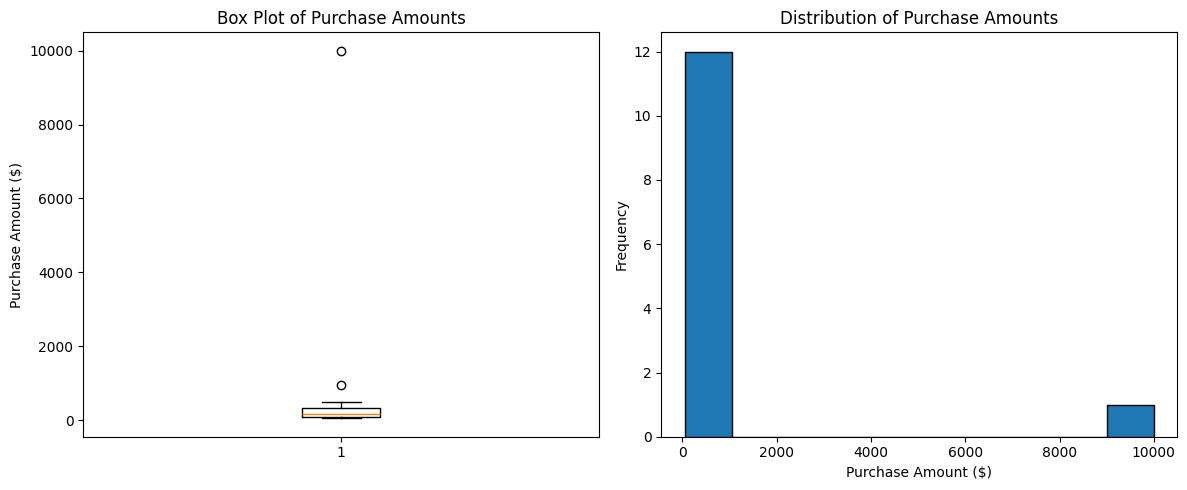

In [61]:
# Visualize purchase amounts with outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Box plot
ax1.boxplot(df['purchase_amount'].dropna())
ax1.set_ylabel('Purchase Amount ($)')
ax1.set_title('Box Plot of Purchase Amounts')

# Histogram
ax2.hist(df['purchase_amount'].dropna(), bins=10, edgecolor='black')
ax2.set_xlabel('Purchase Amount ($)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Purchase Amounts')

plt.tight_layout()
plt.show()

## Section 5: Data Type Issues

Incorrect data types can cause problems during analysis. Let's identify columns with potential data type issues.

In [63]:
# Check current data types
print("Current data types:")
print(df.dtypes)
print("\nNotice that 'age' is stored as object (mixed types) instead of integer.")

Current data types:
customer_id          int64
name                object
age                 object
email               object
signup_date         object
purchase_amount    float64
city                object
dtype: object

Notice that 'age' is stored as object (mixed types) instead of integer.


In [64]:
# Identify mixed data types in the age column
age_types = df['age'].apply(lambda x: type(x).__name__).value_counts()
print("Data types in age column:")
print(age_types)
print("\nRows with non-integer age values:")
non_int_ages = df[df['age'].apply(lambda x: not isinstance(x, int))]
display(non_int_ages[['customer_id', 'name', 'age']])

Data types in age column:
age
int    14
str     1
Name: count, dtype: int64

Rows with non-integer age values:


,customer_id,name,age
2,103,Bob Johnson,45


In [65]:
# Check if dates can be properly parsed
def check_date_parsing(date_str):
    try:
        pd.to_datetime(date_str)
        return 'Valid'
    except:
        return 'Invalid'

df['date_parse_status'] = df['signup_date'].apply(check_date_parsing)
print("Date parsing results:")
print(df['date_parse_status'].value_counts())

if (df['date_parse_status'] == 'Invalid').any():
    print("\nRows with unparseable dates:")
    display(df[df['date_parse_status'] == 'Invalid'][['customer_id', 'signup_date']])

# Clean up temporary column
df.drop('date_parse_status', axis=1, inplace=True)

Date parsing results:
date_parse_status
Valid    15
Name: count, dtype: int64


### Exercise 5: Create a Data Quality Report
Create a function that generates a comprehensive data quality report for any dataframe.

In [66]:
def generate_quality_report(dataframe):
    """
    Generate a data quality report for the given dataframe.
    
    Your function should return a dictionary containing:
    - Total number of rows
    - Total number of columns
    - Number of columns with missing values
    - Total number of duplicate rows
    - Columns with potential data type issues
    """
    # Your code here
    pass

# Test your function
report = generate_quality_report(df)
print(report)

None


## Summary

In this notebook, we've learned how to detect various data quality issues:

1. **Missing Data**: Used `.isnull()` and visualization to identify missing values
2. **Duplicates**: Found exact and near-duplicate records
3. **Inconsistencies**: Detected formatting and naming inconsistencies
4. **Outliers**: Used statistical methods to identify potential outliers
5. **Data Type Issues**: Found mixed types and incorrect data types

These techniques form the foundation for data cleaning, which we'll explore in the next lesson.